In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob


In [2]:
# read in data to panda
# get the number of unclassified reads from Kraken2 outputs

InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Coverage/fromMapping/"
files=glob.glob(InPath+"Gent*cov_chr2.txt")

outPath = "/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Coverage/out"

len(files)


2

7140
4642


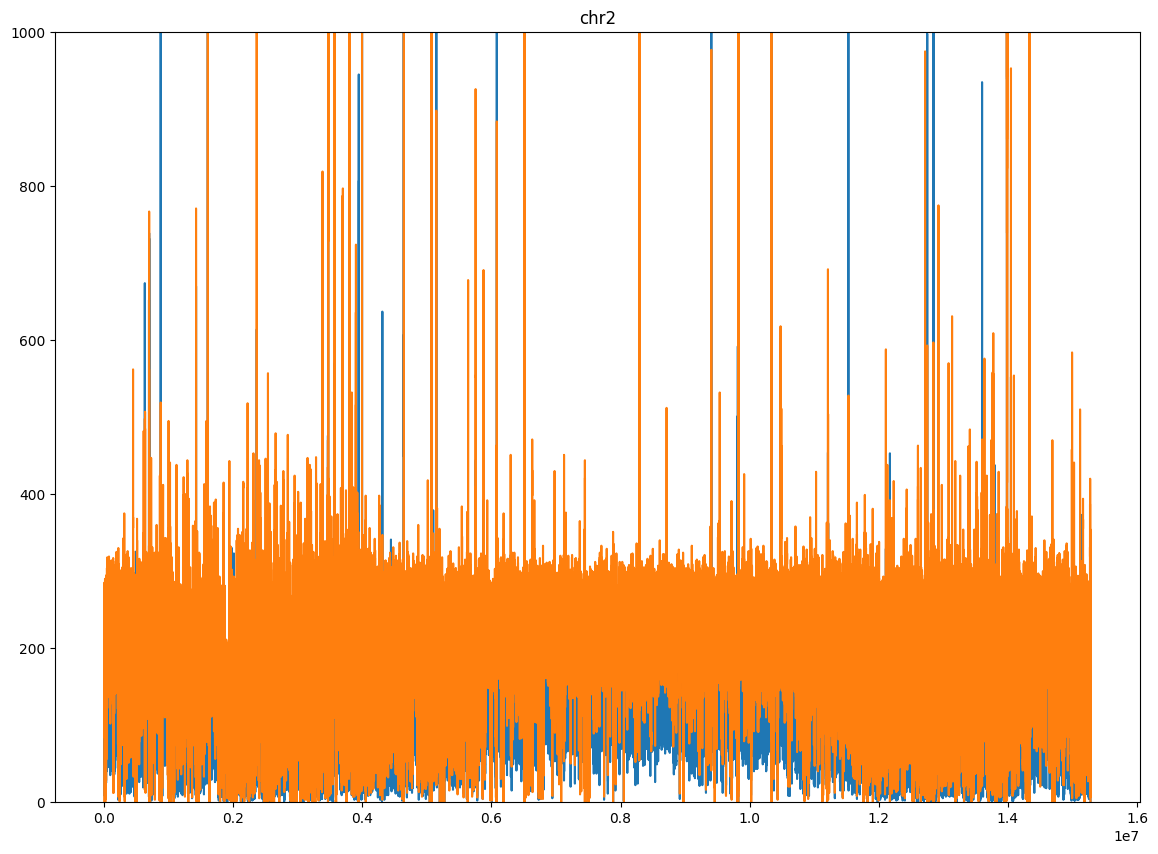

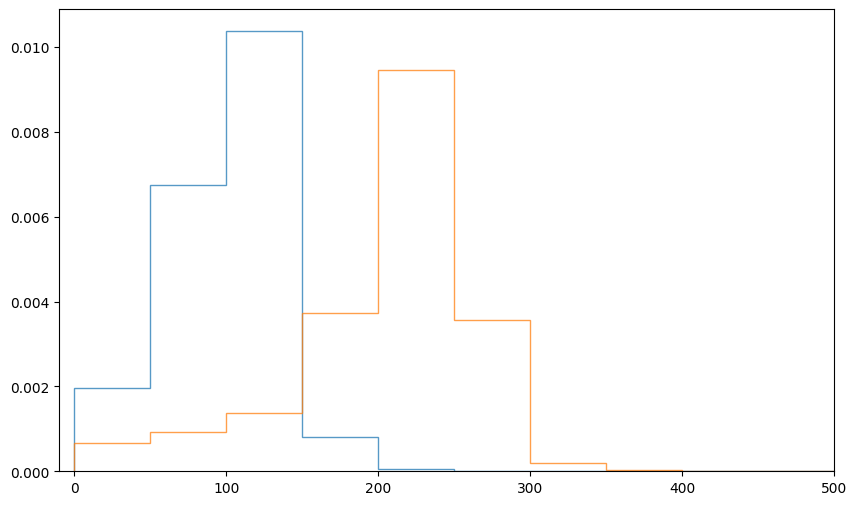

In [7]:
samName_collect = []
means = np.zeros(len(files))
standdev = np.zeros(len(files))

fig, ax = plt.subplots(figsize=(14,10))
fig1, ax1 = plt.subplots(figsize=[10,6])

binRange= np.arange(0,10000, 50)

for i in range(len(files)):
    df_pre = []
    
    a = files[i].split('/')
    sample=a[-1].split('_')

    sampleName="_".join(sample[0:4])
    samName_collect.append(sampleName)

    df_pre=pd.read_csv(files[i],header=None, delimiter="\t", index_col=False, na_values="na")
    
    means[i] = np.mean(df_pre.iloc[:,2].values)
    standdev[i] = np.std(df_pre.iloc[:,2].values)

    ax.plot(df_pre.iloc[:,1].values,df_pre.iloc[:,2].values, label = sampleName)
    #ax.set_xlim([16080000,16500000])
    ax.set_ylim([0,1000])
    #ax.scatter(3171863, 300, s=320, marker='*', color='gold', zorder=3) # chr1
    #ax.scatter(11790970, 300, s=320, marker='*', color='gold', zorder=3) # chr1
    #ax.scatter(13273365, 300, s=320, marker='*', color='gold', zorder=3) # chr1
    #ax.scatter(3940498, 300, s=320, marker='*', color='gold', zorder=3) # chr4
    #ax.scatter(3076313, 300, s=320, marker='*', color='gold', zorder=3) # chr4
    #ax.scatter(11071152, 300, s=320, marker='*', color='gold', zorder=3) # chr4
    #ax.scatter(16088488, 300, s=320, marker='*', color='gold', zorder=3) # chr5
    #ax.scatter(16088496, 300, s=320, marker='*', color='gold', zorder=3) # chr5
    #ax.scatter(16088499, 300, s=320, marker='*', color='gold', zorder=3) # chr5
    #ax.scatter(16088503, 300, s=320, marker='*', color='gold', zorder=3) # chr5
    #ax.scatter(16458563, 300, s=320, marker='*', color='gold', zorder=3) # chr5

    #ax.legend()
    ax.set_title("chr2")
    # plot the histogram   
    ax1.hist(df_pre.iloc[:,2].values, bins=binRange, density=True, histtype='step',facecolor='g', alpha=0.75) # cumulative=True, 
    ax1.set_xlim([-10,500])
    #ax1.set_yscale("log")

    print(max(df_pre.iloc[:,2].values))

In [5]:
df_collect=pd.DataFrame({
    "sample": samName_collect,
    "mean":means,
    "stddeviation":standdev
})

In [6]:
df_collect

,sample,mean,stddeviation
0,Gent_bb_15_1,101.792921,76.351151
1,Gent_bb_1_1,206.016204,71.613568


In [67]:
binRange

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290])

range(0, 2)